# 19 - PCA
- 19.1 PCA: Interpretations and applications
- 19.2 How to perform a PCA
- 19.3 Algebra of PCA
- 19.4 Regularization
- 19.5 Is PCA always the best?
- 19.6 Code challenges
- 19.7 Code solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 19.1 PCA: Interpretations and applications
Goal of PCA is to find a set of basis vectors for a data matrix that point in the direction of maximum variance and are mutually orthogonal.

Q: How to find the basis vectors? 
- A: Perform eigendecomposition of the covariance matrix $\text{eig}(C)$.

Q: Why mutually orthogonal? 
- A: Decorrelate the data.

Q: How to select the number of principal components?
- A: Use a scree plot to select the eigenvectors that capture some threshold of total variance. 
    - Similar to technique used to perform low-rank approximation of SVD (_16.8_).
    - Unlike SVD, the eigendecomposition will not return eigenvectors sorted by eigenvalues. Sorting by eigenvalue is an extra step in PCA.

## 19.2 How to perform a PCA
1. Start with a data matrix $X$ with obsevations in rows and features in columns.
2. Compute the covariance matrix $C$ from centered (0-mean) observations as $C = E[(X - \mu)(X - \mu)^T]$.
3. Perform eigendecomposition of the covariance matrix $\text{eig}(C)$ to obtain $\Lambda$ and $V$.
4. Sort the eigenvalues $\Lambda$ and eigenvectors $V$ in descending order by magnitude of the eigenvalues.
5. Project the data matrix $X$ using the $k$ largest eigenvectors $X V$.

Notes
- $V$ is an orthogonal matrix that is a basis in $\mathbb{R}^n$.
- For a data matrix with the observations in columns, then eigenvectors are returned as orthogonal matrix $U$ that is a basis in $\mathbb{R}^m$. 

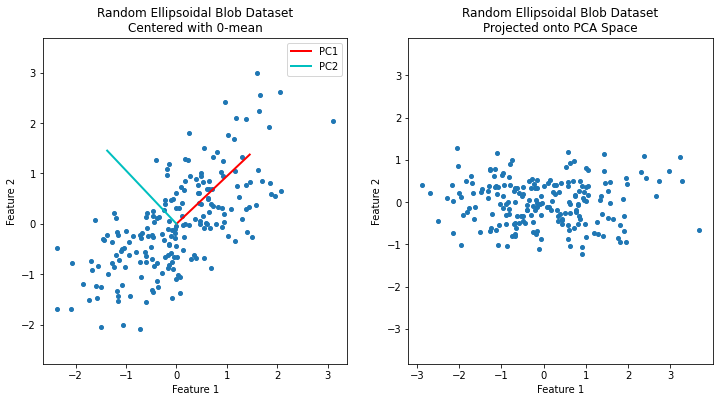

In [2]:
def pca(X):
    """
    pca returns the principal components of the data matrix X

    :param X: numpy.ndarray          Matrix X with observations in rows
    :return: tuple of numpy.ndarray  Eigenvalues and eigenvectors in descending order
    """
    # Center the data to 0-mean along the columns.
    mu = np.mean(X, axis=0)
    Xmu = X - mu

    # Compute the covariance matrix.
    C = (Xmu.T @ Xmu) / X.shape[0]

    # Compute the eigendecomposition of the covariance matrix.
    L, V = np.linalg.eig(C)

    # Reorder the eigenvalues and eigenvectors in descending order.
    inds = np.flip(np.argsort(L))
    L, V = L[inds], V[:,inds]

    return L, V


# Generate a dataset of 2 features with normally distributed scatter.
m = 200
mu1, var1, mu2, var2, r = 5, 1, 2, 0.75, 0.6
mean = np.array([mu1, mu2])
cov = np.array([[var1, r],[r, var2]])
X = np.random.multivariate_normal(mean, cov, size=(m))

# Compute the principal components.
L, V = pca(X)

# Verify the basis vectors are orthogonal.
np.testing.assert_almost_equal(np.dot(V[:,0], V[:,1]), 0.)

# Center data for plotting.
Xmu = X - np.mean(X, axis=0)

# Project the data onto the orthogonal vector space spanned by V.
Xpca = Xmu @ V

# Plot the dataset superimposed with principal component vectors.
fig1, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0].axis('equal')  # Force equal aspect ratio to display perp eigenvectors.
axes[0].scatter(Xmu[:,0], Xmu[:,1], s=16)
axes[0].plot([0,V[0,0]*2],[0,V[1,0]*2], c='r', lw=2, label='PC1')  # Scale 2X.
axes[0].plot([0,V[0,1]*2],[0,V[1,1]*2], c='c', lw=2, label='PC2')  # Scale 2X.
axes[0].set_title('Random Ellipsoidal Blob Dataset\nCentered with 0-mean')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].legend()
axes[1].axis('equal')
axes[1].scatter(Xpca[:,0], Xpca[:,1], s=16)
axes[1].set_title('Random Ellipsoidal Blob Dataset\nProjected onto PCA Space')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
plt.show()

## 19.3 Algebra of PCA
Normalized quadratic form (_17.3_) describes the amount of variance in the direction of an eigenvector.

$$
f_{norm}(A, v) = \frac{v^T C v}{v^T v}
$$

Generalizing the equation to matrices, this is equivalent to diagonalization (_15.4_) of the covariance matrix $C$.

$$
C V = V \Lambda
$$

### PCA via SVD
SVD can be used to perform PCA.
- Recall from (_16.2_) that SVD will take the eigendecomposition of the symmetric matrix $A^T A$ or $A A^T$.
- Pass the centered 0-mean dataset to the SVD to mimic the covariance matrix $C = E[(X - \mu)^T(X - \mu)]$.

#### Eigenvectors.
- For a data matrix with the observations in rows, then eigenvectors are returned as orthogonal matrix $V$ that is a basis for $\mathbb{R}^n$.
- For a data matrix with the observations in columns, then eigenvectors are returned as orthogonal matrix $U$ that is a basis in $\mathbb{R}^m$.

#### Eigenvalues.
- Squared singular values correspond to the eigenvalues of covariance matrix.

## 19.4 Regularization

## 19.5 Is PCA always the best?
PCA is appropriate when data are correlated, since the eigendecomposition of the covariance matrix will decorrelate.

Other techniques such as ICA or GMM may work better for separating multivariate data which are not correlated.

## 19.6 Code challenges

> The goal of this challenge is to simulate a dataset and then perform PCA.  Create a dataset of heights and weights  from N=1000 people as described below. After creating those variables perform a PCA and make a scatter plot of the mean-centered data with the two principal component vectors drawn on top.
>
> Height
>
> Create 1000 linearly spaced numbers between 150 and 190, then add random Gaussian noise with a standard deviation of 5. Units are cm.
>
> Weight
>
> Create 1000 correlated weight values using the formula w = .7h - 50, then add Gaussian noise with a standard deviation of 10. Units are kg.

Notes
- Unlike the plots in (_19.2_), the plot on the left shows the dataset at original scale. This required me to shift the principal components by the mean of each respective dataset in order to have the principal components appear at the center of mass of the scatter plot.
- The 30X scale on the principal components is arbitrary and will vary for each dataset.

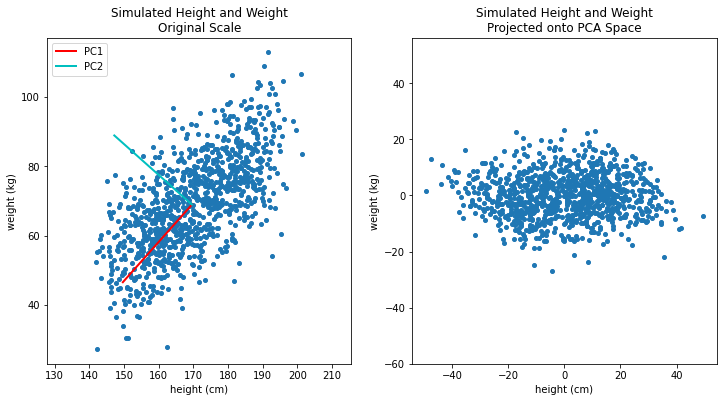

In [3]:
# Generate a random dataset of correlated height (cm) and weight (kg).
n = 1000
height = np.linspace(start=150, stop=190, num=n) + np.random.normal(scale=5, size=n)
weight = 0.7 * height - 50 + np.random.normal(scale=10, size=n)
X = np.stack((height, weight), axis=1)

# Compute the principal components.
L, V = pca(X)

# Verify the basis vectors are orthogonal.
np.testing.assert_almost_equal(np.dot(V[:,0], V[:,1]), 0.)

# Center data for plotting.
mu = np.mean(X, axis=0)
Xmu = X - mu

# Project the data onto the orthogonal vector space spanned by V.
Xpca = Xmu @ V

# Plot the dataset superimposed with principal component vectors.
fig1, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0].axis('equal')  # Force equal aspect ratio to display perp eigenvectors.
axes[0].scatter(X[:,0], X[:,1], s=16)
axes[0].plot([mu[0],30*V[0,0]+mu[0]],
             [mu[1],30*V[1,0]+mu[1]], 
             c='r', lw=2, label='PC1')  # Scale 30X.
axes[0].plot([mu[0],30*V[0,1]+mu[0]],
             [mu[1],30*V[1,1]+mu[1]], 
             c='c', lw=2, label='PC2')  # Scale 30X.
axes[0].set_title('Simulated Height and Weight\nOriginal Scale')
axes[0].set_xlabel('height (cm)')
axes[0].set_ylabel('weight (kg)')
axes[0].legend()
axes[1].axis('equal')
axes[1].scatter(Xpca[:,0], Xpca[:,1], s=16)
axes[1].set_title('Simulated Height and Weight\nProjected onto PCA Space')
axes[1].set_xlabel('height (cm)')
axes[1].set_ylabel('weight (kg)')
plt.show()

> Now implement PCA on the same dataset via SVD of the data matrix. Keep in mind that the principal components will be in V when the observations are in rows and will be in U when the observations are in columns. Check that the singular vectors match the eigenvalues and eigenvectors from the previous exercise.

In [4]:
# SVD will perform eigendecomposition of Xmu.T @ Xmu.
_, Lpca, Vpca = np.linalg.svd(Xmu)

# Verify the eigenvectors returned by SVD match PCA.
np.testing.assert_almost_equal(np.abs(Vpca), np.abs(V))

# Squared singular values correspond to the eigenvalues of covariance matrix.
Sigma = Lpca**2/n

# Verify the eigenvalues returned by SVD match PCA.
np.testing.assert_almost_equal(Sigma, L)